In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#spliting traing and testing images data
(train_images,train_labels) , (test_images, test_lables) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#cheching length of training and testing data
print(len(train_images))
print(len(train_labels))

60000
60000


In [ ]:
print(len(test_images))
print(len(test_lables))

10000
10000


In [ ]:
#checking the shpes of our data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_lables.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class name Ankle boot


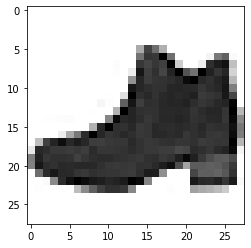

In [ ]:
import matplotlib.pyplot as plt
print("class name" , class_names[train_labels[15]])
plt.imshow(train_images[15] , cmap=plt.cm.binary)
plt.show()

In [ ]:
#checking unique labels
import numpy as np
print(np.unique(train_labels))
print(np.unique(test_lables))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(train_images.shape)
train_images=train_images.reshape((60000, 28*28))
print(train_images.shape)
train_images=train_images.astype("float32")/255
print(train_images.shape)

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype("float32")/255

(60000, 28, 28)
(60000, 784)
(60000, 784)


In [ ]:
train_labels[2]

0

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_lables = to_categorical(test_lables)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.activations import relu ,softmax
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
network = Sequential()
network.add(Dense(512 , activation=relu , input_shape=(28*28,)))
network.add(Dropout(0.2))
network.add(Dense(10 , activation=softmax))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['acc'])

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
history=network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.7560 - acc: 0.7420
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4019 - acc: 0.8535
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3568 - acc: 0.8693
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3344 - acc: 0.8779
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3185 - acc: 0.8840


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


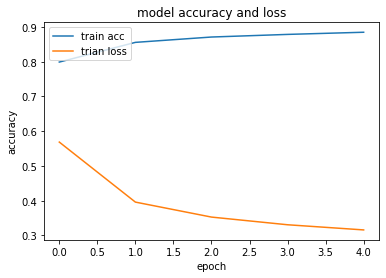

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','trian loss'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_images , test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.3504 - acc: 0.8779
